In [ ]:
#Part 1: Setup and Data Loading
# Step 1: Mount Google Drive (if your dataset is stored there)
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install required libraries
!pip install tensorflow transformers pandas numpy matplotlib seaborn scikit-learn

# Step 3: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, GRU, Dense, Dropout, Bidirectional, Concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, TFBertModel

# Step 4: Check GPU availability
print("GPU Available:", tf.test.is_gpu_available())
if tf.test.is_gpu_available():
    device_name = tf.test.gpu_device_name()
    print('GPU device:', device_name)
else:
    print('Using CPU')

Mounted at /content/drive


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: True
GPU device: /device:GPU:0


In [ ]:
# Part 2: Data Preparation
# Step 5: Load the dataset (replace with your actual path)
# For this example, we'll assume a CSV with 'text' and 'language' columns
dataset_path = '/content/drive/MyDrive/LanguageDetection.csv'  # Update this path
df = pd.read_csv(dataset_path)

# Verify column names
print("DataFrame columns:", df.columns.tolist())

# Step 6: Explore the dataset
print("\nFirst 5 rows:")
print(df.head())
print("\nLanguage distribution:")
print(df['Language'].value_counts())

# Step 7: Preprocess the data
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase and ensure it's string
    text = text.strip()  # Remove whitespace
    # Remove special characters if needed
    text = ''.join(c for c in text if c.isalnum() or c.isspace())
    return text

df['Text'] = df['Text'].apply(clean_text)

# Step 8: Encode labels
label_encoder = LabelEncoder()
df['language_encoded'] = label_encoder.fit_transform(df['Language'])

# Step 9: Split data into train and test sets
X = df['Text']
y = df['language_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Number of unique languages: {len(label_encoder.classes_)}")
print("Language classes:", label_encoder.classes_)

DataFrame columns: ['Text', 'Language']

First 5 rows:
                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English

Language distribution:
Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

Training samples: 8269
Testing samples: 2068
Number of unique languages: 17
Language classes: ['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Mal

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 100, 128)       │      2,560,000 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_4           │ (None, 100, 128)       │         98,816 │ embedding_1[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_6           │ (None, 100, 128)       │         74,496 │ embedding_1[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 100, 128)       │              0 │ bidirectional_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 100, 128)       │              0 │ bidirectional_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_5           │ (None, 64)             │         41,216 │ dropout_4[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_7           │ (None, 64)             │         31,104 │ dropout_5[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128)            │              0 │ bidirectional_5[0][0], │
│ (Concatenate)             │                        │                │ bidirectional_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 128)            │              0 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 17)             │          2,193 │ dropout_6[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,807,825 (10.71 MB)

 Trainable params: 2,807,825 (10.71 MB)

 Non-trainable params: 0 (0.00 B)


Starting training...
Epoch 1/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.2203 - loss: 2.4694 - val_accuracy: 0.7655 - val_loss: 0.8944
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.8293 - loss: 0.6732 - val_accuracy: 0.9313 - val_loss: 0.2708
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9615 - loss: 0.2003 - val_accuracy: 0.9454 - val_loss: 0.2250
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9838 - loss: 0.0973 - val_accuracy: 0.9555 - val_loss: 0.1581
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9858 - loss: 0.0696 - val_accuracy: 0.9521 - val_loss: 0.1811
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.9865 - loss: 0.0765 - val_accuracy: 0.9560 - val_loss: 0.1464
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9849 - loss: 0.0660 - val_accuracy: 0.9541 - val_loss: 0.1545
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.9878

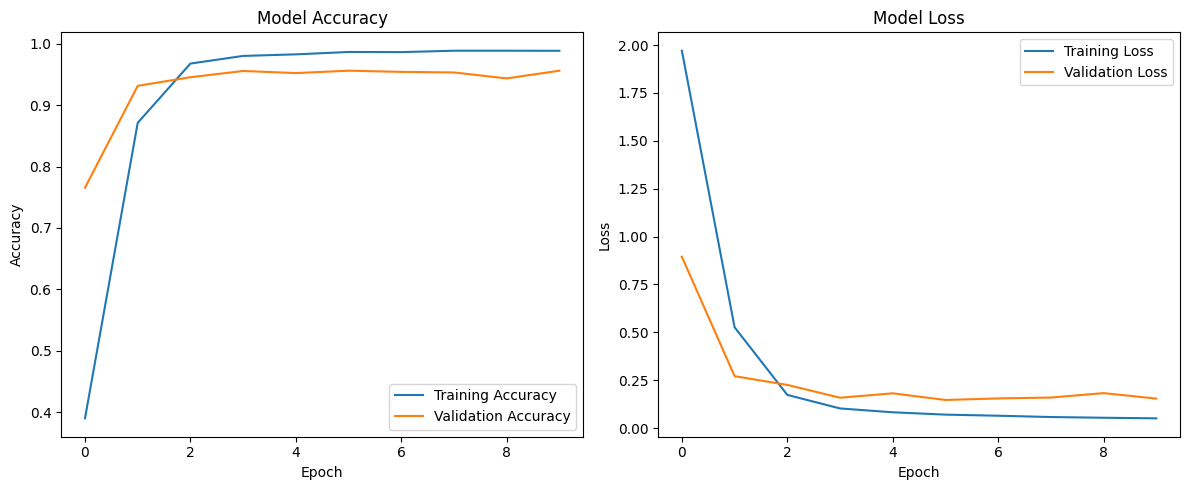


Evaluating on test data...
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step



Test Accuracy: 95.60%

Classification Report:
              precision    recall  f1-score   support

      Arabic       0.94      0.93      0.94       107
      Danish       0.96      0.95      0.96        86
       Dutch       1.00      0.96      0.98       109
     English       0.98      0.99      0.98       277
      French       1.00      0.96      0.98       203
      German       1.00      0.97      0.98        94
       Greek       1.00      0.96      0.98        73
       Hindi       1.00      1.00      1.00        12
     Italian       0.97      0.94      0.96       140
     Kannada       0.95      0.96      0.95        74
   Malayalam       0.92      0.94      0.93       119
  Portugeese       1.00      0.96      0.98       148
     Russian       0.75      0.98      0.85       138
     Spanish       0.94      0.97      0.95       164
    Sweedish       0.98      0.94      0.96       135
       Tamil       0.99      0.93      0.96        94
     Turkish       0.99      0.88 

In [ ]:
# Part 3: Traditional NLP Model (LSTM + GRU Hybrid)
# Part 3: Traditional NLP Model (LSTM + GRU Hybrid)

# Step 10: Tokenization and sequence preparation
vocab_size = 20000  # Adjust based on your dataset
max_length = 100    # Adjust based on your text length

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# Step 11: Build LSTM+GRU hybrid model
embedding_dim = 128
num_classes = len(label_encoder.classes_)

# Input layer
input_layer = Input(shape=(max_length,))

# Embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim)(input_layer)

# LSTM branch
lstm_branch = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
lstm_branch = Dropout(0.3)(lstm_branch)
lstm_branch = Bidirectional(LSTM(32))(lstm_branch)

# GRU branch
gru_branch = Bidirectional(GRU(64, return_sequences=True))(embedding_layer)
gru_branch = Dropout(0.3)(gru_branch)
gru_branch = Bidirectional(GRU(32))(gru_branch)

# Concatenate both branches
merged = Concatenate()([lstm_branch, gru_branch])
merged = Dropout(0.5)(merged)

# Output layer
output_layer = Dense(num_classes, activation='softmax')(merged)

# Create model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
hybrid_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Model summary
hybrid_model.summary()

# Step 12: Train the model
batch_size = 64
epochs = 10

print("\nStarting training...")
history = hybrid_model.fit(
    X_train_pad, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test_pad, y_test),
    verbose=1
)

# Step 13: Evaluate the model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions
print("\nEvaluating on test data...")
y_pred = np.argmax(hybrid_model.predict(X_test_pad), axis=1)
test_accuracy = accuracy_score(y_test, y_pred)

print("\nTest Accuracy: {:.2f}%".format(test_accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save the model if accuracy is good
if test_accuracy > 0.85:  # You can adjust this threshold
    hybrid_model.save('/content/drive/MyDrive/lstm_gru_hybrid_model.h5')
    print("Model saved with good accuracy")
else:
    print("Model accuracy needs improvement")

In [ ]:
!pip install transformers


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenizing function
def tokenize_texts(texts, max_len=100):
    return tokenizer(
        list(texts),
        add_special_tokens=True,
        padding='max_length',
        max_length=max_len,
        truncation=True,
        return_tensors='tf',
        return_attention_mask=True,
        return_token_type_ids=False
    )

# Tokenize your data
max_len = 100
train_encodings = tokenize_texts(X_train, max_len=max_len)
test_encodings = tokenize_texts(X_test, max_len=max_len)


In [ ]:
num_classes = len(label_encoder.classes_)
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


In [ ]:
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
import tensorflow as tf

# Load BERT base model and tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Model Inputs
input_ids = Input(shape=(100,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(100,), dtype=tf.int32, name='attention_mask')

# Lambda layer to extract CLS token from BERT outputs
def get_cls_output(inputs):
    input_ids, attention_mask = inputs
    outputs = bert_model(input_ids, attention_mask=attention_mask)
    return outputs.last_hidden_state[:, 0, :]  # [CLS] token representation

# Define Lambda layer with output shape explicitly
hidden_size = bert_model.config.hidden_size
cls_output = Lambda(get_cls_output, output_shape=(hidden_size,))([input_ids, attention_mask])

# Add dropout and final classification layer
dropout = Dropout(0.3)(cls_output)
output = Dense(num_classes, activation='softmax')(dropout)

# Build the model
model = Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_4 (Lambda)         │ (None, 768)            │              0 │ input_ids[0][0],       │
│                           │                        │                │ attention_mask[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 768)            │              0 │ lambda_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 17)             │         13,073 │ dropout_7[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 13,073 (51.07 KB)

 Trainable params: 13,073 (51.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
%whos


Variable                Type             Data/Info
--------------------------------------------------
Adam                    type             <class 'keras.src.optimizers.adam.Adam'>
BertLayer               type             <class '__main__.BertLayer'>
BertTokenizer           type             <class 'transformers.mode<...>tion_bert.BertTokenizer'>
Bidirectional           type             <class 'keras.src.layers.<...>rectional.Bidirectional'>
Concatenate             type             <class 'keras.src.layers.<...>concatenate.Concatenate'>
Dense                   type             <class 'keras.src.layers.core.dense.Dense'>
Dropout                 type             <class 'keras.src.layers.<...>ization.dropout.Dropout'>
Embedding               type             <class 'keras.src.layers.<...>ore.embedding.Embedding'>
GRU                     type             <class 'keras.src.layers.rnn.gru.GRU'>
Input                   function         <function Input at 0x7f954c45ca40>
LSTM                

In [ ]:
print("Input IDs shape:", X_train_input_ids.shape)


Input IDs shape: (8269, 100)


In [ ]:
print("Attention Mask shape:", X_train_attention.shape)


Attention Mask shape: (8269, 100)


In [ ]:
print("Test Input IDs shape:", X_test_input_ids.shape)
print("Test Attention Mask shape:", X_test_attention.shape)


Test Input IDs shape: (2068, 100)
Test Attention Mask shape: (2068, 100)


In [ ]:
for layer in hybrid_model.layers:
    if 'InputLayer' in str(type(layer)):
        print(layer.name)


input_layer_1


In [ ]:
from transformers import TFBertModel
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
import tensorflow as tf

# Load pre-trained BERT
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Define inputs
input_ids = Input(shape=(100,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(100,), dtype=tf.int32, name='attention_mask')

# Lambda layer with output_shape specified
bert_outputs = Lambda(
    lambda x: bert_model(input_ids=x['input_ids'], attention_mask=x['attention_mask'])[1],
    output_shape=(768,)
)({'input_ids': input_ids, 'attention_mask': attention_mask})

# Add dropout and final classification layer
x = Dropout(0.3)(bert_outputs)
output = Dense(3, activation='softmax')(x)

# Build and compile the model
hybrid_model = Model(inputs=[input_ids, attention_mask], outputs=output)
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
from transformers import TFBertModel, BertTokenizer
import tensorflow as tf

# Load model and tokenizer
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample text
texts = ["This is a test sentence."]

# Tokenize inputs
inputs = tokenizer(texts, return_tensors="tf", padding=True, truncation=True, max_length=100)

# Pass through BERT
outputs = bert_model(**inputs)

# Get pooled output (for classification)
pooled_output = outputs.pooler_output  # shape: (batch_size, hidden_size)
print("Pooled Output Shape:", pooled_output.shape)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Pooled Output Shape: (1, 768)


In [ ]:
from transformers import TFBertModel
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
import tensorflow as tf

# Load pre-trained BERT
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Define Inputs
input_ids = Input(shape=(100,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(100,), dtype=tf.int32, name='attention_mask')

# Lambda Layer with explicit output_shape
bert_outputs = Lambda(
    lambda x: bert_model(x)[1],  # pooled_output
    output_shape=(768,),         # BERT base pooled output shape
    name="bert_layer"
)({'input_ids': input_ids, 'attention_mask': attention_mask})

# Classification layer
output = Dense(1, activation='sigmoid')(bert_outputs)

# Final Model
model = Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ attention_mask            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_ids (InputLayer)    │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer (Lambda)       │ (None, 768)            │              0 │ attention_mask[0][0],  │
│                           │                        │                │ input_ids[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │            769 │ bert_layer[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokens = tokenizer("This is my sample sentence.", padding='max_length', truncation=True, max_length=100, return_tensors='tf')
input_ids = tokens['input_ids']
attention_mask = tokens['attention_mask']


In [ ]:
!pip install -q transformers


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import DistilBertTokenizer, TFDistilBertModel
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda
from tensorflow.keras.models import Model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Change this to your actual dataset path
df = pd.read_csv('/content/drive/MyDrive/LanguageDetection.csv')

# View first few rows
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [ ]:
# Encode target labels
label_encoder = LabelEncoder()
df['Language'] = label_encoder.fit_transform(df['Language'])

# Split dataset
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Text'].values, df['Language'].values, test_size=0.2, random_state=42)

# Load tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the data
train_encodings = tokenizer(
    list(train_texts), truncation=True, padding=True, max_length=100, return_tensors='tf')
val_encodings = tokenizer(
    list(val_texts), truncation=True, padding=True, max_length=100, return_tensors='tf')

# Get number of classes
num_classes = len(label_encoder.classes_)


In [ ]:
# Inputs
input_ids = Input(shape=(100,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(100,), dtype=tf.int32, name="attention_mask")

# Load pretrained DistilBERT
bert_model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")

# Define Lambda with output shape
def extract_bert_cls(inputs):
    input_ids, attention_mask = inputs
    outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)
    return outputs.last_hidden_state[:, 0, :]  # CLS token

# ✅ Provide output_shape explicitly
bert_output = Lambda(
    extract_bert_cls,
    output_shape=(768,),
    name="cls_extraction"
)([input_ids, attention_mask])

# Classification head
dense = Dense(256, activation='relu')(bert_output)
dropout = Dropout(0.3)(dense)
output = Dense(num_classes, activation='softmax')(dropout)

# Define and compile model
model = Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cls_extraction (Lambda)   │ (None, 768)            │              0 │ input_ids[0][0],       │
│                           │                        │                │ attention_mask[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 256)            │        196,864 │ cls_extraction[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_9 (Dropout)       │ (None, 256)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 17)             │          4,369 │ dropout_9[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 201,233 (786.07 KB)

 Trainable params: 201,233 (786.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
MAX_LEN = 100  # define max token length

# Tokenize all input data
input_ids, attention_mask = tokenize_texts(texts, tokenizer, MAX_LEN)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Assume `texts` and `labels` are your raw data
# Tokenize the input texts
def tokenize_texts(texts, tokenizer, max_len):
    encoding = tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=max_len,
        return_tensors='np'
    )
    return encoding['input_ids'], encoding['attention_mask']

# Tokenize all input data
input_ids, attention_mask = tokenize_texts(texts, tokenizer, MAX_LEN)

# Convert labels to categorical (one-hot encoded)
labels_categorical = to_categorical(labels, num_classes=17)

# Train-validation split
train_input_ids, val_input_ids, train_attention_mask, val_attention_mask, train_labels, val_labels = train_test_split(
    input_ids,
    attention_mask,
    labels_categorical,
    test_size=0.2,
    random_state=42
)


In [ ]:
loss='categorical_crossentropy'


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    x={'input_ids': train_input_ids, 'attention_mask': train_attention_mask},
    y=train_labels,
    validation_data=(
        {'input_ids': val_input_ids, 'attention_mask': val_attention_mask},
        val_labels
    ),
    epochs=3,
    batch_size=32
)


Epoch 1/3
259/259 ━━━━━━━━━━━━━━━━━━━━ 48s 134ms/step - accuracy: 0.1552 - loss: 2.7118 - val_accuracy: 0.7220 - val_loss: 1.8863
Epoch 2/3
259/259 ━━━━━━━━━━━━━━━━━━━━ 32s 125ms/step - accuracy: 0.6309 - loss: 1.7639 - val_accuracy: 0.8748 - val_loss: 1.1928
Epoch 3/3
259/259 ━━━━━━━━━━━━━━━━━━━━ 42s 128ms/step - accuracy: 0.8219 - loss: 1.1587 - val_accuracy: 0.8897 - val_loss: 0.8096


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/LanguageDetection.csv')  # Use your correct path

# Get texts and labels
texts = df['Text'].tolist()
labels = df['Language'].astype('category').cat.codes  # Convert labels to integers

# Convert labels to categorical for training
from tensorflow.keras.utils import to_categorical
labels_cat = to_categorical(labels)

# Split the dataset: train 70%, val 15%, test 15%
X_temp, test_texts, y_temp, test_labels = train_test_split(texts, labels_cat, test_size=0.15, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)
# 0.1765 of 85% ≈ 15% total for validation


In [ ]:
# Tokenize
train_input_ids, train_attention_mask = tokenize_texts(train_texts, tokenizer, MAX_LEN)
val_input_ids, val_attention_mask = tokenize_texts(val_texts, tokenizer, MAX_LEN)
test_input_ids, test_attention_mask = tokenize_texts(test_texts, tokenizer, MAX_LEN)


In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(
    x={'input_ids': test_input_ids, 'attention_mask': test_attention_mask},
    y=test_labels
)

print(f"✅ Test Accuracy: {test_accuracy:.4f}")


49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - accuracy: 0.8997 - loss: 0.7672
✅ Test Accuracy: 0.8910


In [ ]:
def predict_language(text):
    # Tokenize
    encoding = tokenizer.encode_plus(
        text,
        truncation=True,
        padding='max_length',
        max_length=MAX_LEN,
        return_tensors='tf'
    )

    # Predict
    outputs = model.predict({
        'input_ids': encoding['input_ids'],
        'attention_mask': encoding['attention_mask']
    })

    predicted_label = tf.argmax(outputs.logits if hasattr(outputs, 'logits') else outputs, axis=1).numpy()[0]

    # Map index back to original label
    label_map = dict(enumerate(df['Language'].astype('category').cat.categories))
    return label_map[predicted_label]

# Example
print(predict_language("Bonjour, comment ça va ?"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
French


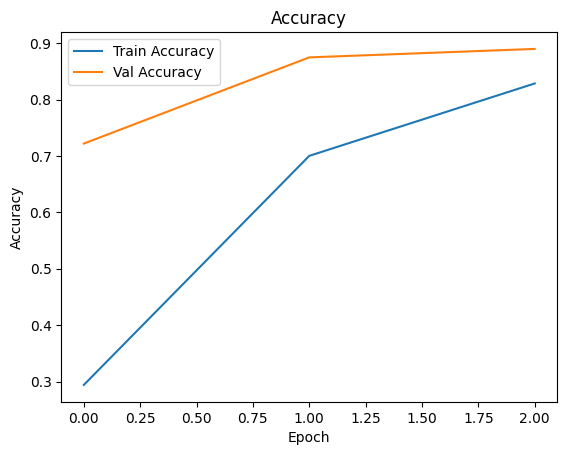

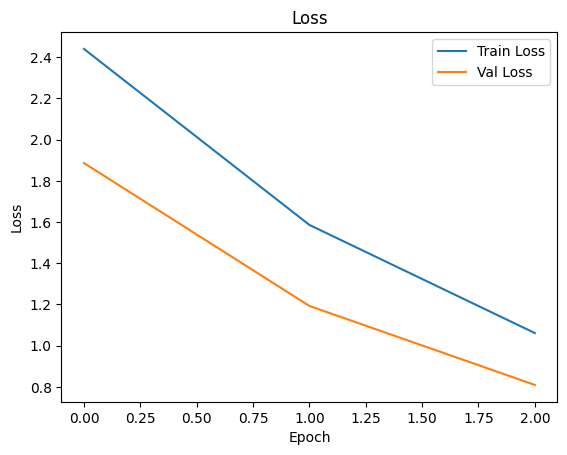

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('distilbert_language_detector.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Bidirectional, LSTM, GRU
from tensorflow.keras.models import Model
from transformers import TFDistilBertModel, DistilBertTokenizer
from tensorflow.keras.layers import Layer

# Load pre-trained tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
bert_model = TFDistilBertModel.from_pretrained('distilbert-base-multilingual-cased')

# Custom wrapper to use BERT in Functional API
class BERTLayer(Layer):
    def __init__(self, **kwargs):
        super(BERTLayer, self).__init__(**kwargs)
        self.bert = bert_model

    def call(self, inputs):
        input_ids, attention_mask = inputs
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        return output.last_hidden_state  # shape: (batch_size, MAX_LEN, 768)

# Constants
MAX_LEN = 100
NUM_CLASSES = train_labels.shape[1]

# Inputs
input_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(MAX_LEN,), dtype=tf.int32, name="attention_mask")

# BERT embedding
bert_output = BERTLayer()([input_ids, attention_mask])

# LSTM + GRU on top
x = Bidirectional(LSTM(128, return_sequences=True))(bert_output)
x = GRU(64)(x)
x = Dropout(0.3)(x)

# Output layer
output = Dense(NUM_CLASSES, activation='softmax')(x)

# Define model
model = Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show summary
model.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)    │ (None, 100)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_mask            │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bert_layer_1 (BERTLayer)  │ (None, 100, 768)       │              0 │ input_ids[0][0],       │
│                           │                        │                │ attention_mask[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_8           │ (None, 100, 256)       │        918,528 │ bert_layer_1[0][0]     │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_4 (GRU)               │ (None, 64)             │         61,824 │ bidirectional_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_10 (Dropout)      │ (None, 64)             │              0 │ gru_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 17)             │          1,105 │ dropout_10[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 981,457 (3.74 MB)

 Trainable params: 981,457 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x={'input_ids': train_input_ids, 'attention_mask': train_attention_mask},
    y=train_labels,
    validation_data=(
        {'input_ids': val_input_ids, 'attention_mask': val_attention_mask},
        val_labels
    ),
    epochs=3,  # Increase as needed
    batch_size=32
)


Epoch 1/3
227/227 ━━━━━━━━━━━━━━━━━━━━ 50s 172ms/step - accuracy: 0.4978 - loss: 1.5519 - val_accuracy: 0.7415 - val_loss: 0.7686
Epoch 2/3
227/227 ━━━━━━━━━━━━━━━━━━━━ 38s 166ms/step - accuracy: 0.7442 - loss: 0.7609 - val_accuracy: 0.7789 - val_loss: 0.6291
Epoch 3/3
227/227 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - accuracy: 0.7962 - loss: 0.6025 - val_accuracy: 0.8150 - val_loss: 0.5288
